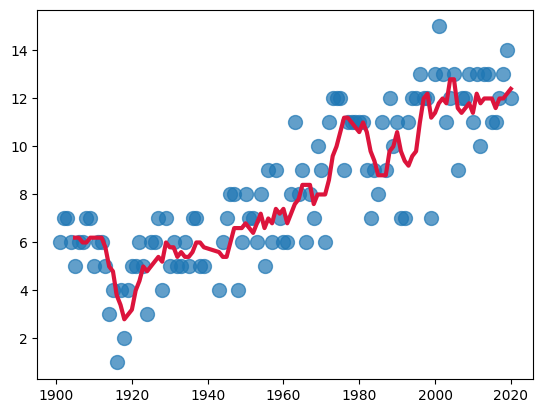

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.colors as mcolors
import numpy as np

df = pd.read_csv("data/nobel_prize_data.csv")

df.sort_values(by=['year'],ascending=True).head(40)
df.year.max()
df.duplicated()
df.isna().sum()


df['share_pct'] = df.laureate_type
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df.loc[df.birth_date.isna()][col_subset]

col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df.loc[df.organization_name.isna()][col_subset]

separated_values = df.prize_share.str.split('/', expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df['share_pct'] = numerator / denomenator

count_female = df[df.sex == 'Female'].value_counts()
female = count_female.sum()
male_count = df[df.sex =='Male'].value_counts()
male = male_count.sum()

biology = df.sex.value_counts()
biology
# Create the pie chart using Plotly Express
# fig = px.pie(labels=biology.index,values = biology.values,title="Percentage of Male vs. Female Winners",
#              names=biology.index,
#              hole=0.4,)

# # Show the pie chart
# fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
# fig.show()
df.duplicated().value_counts()
is_winner = df.duplicated(subset=['full_name'],keep=False)
multiple_winner = df[is_winner] 

catogery = df.category.value_counts()
man_vs_women = df.sex.value_counts()
# fig = px.bar(df,x=df.index,y=df.values,color=man_vs_women.index)

# fig.show()
# ecnomic = df[df.category == 'Economics']
# ecnomic.sort_values(by=['year'],ascending=True)
# ecnomic.full_name

# print(f"There are {multiple_winner.full_name.unique()}")
cat_men_women = df.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

# v_bar_split = px.bar(x = cat_men_women.category,
#                      y = cat_men_women.prize,
#                      color = cat_men_women.sex,
#                      title='Number of Prizes Awarded per Category split by Men and Women')

# v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
#                           yaxis_title='Number of Prizes')
# v_bar_split.show()

# count = df.year.value_counts()
prize_per_year = df.groupby(by='year').count().prize 
moving_average = prize_per_year.rolling(window=5).mean()

plt.scatter(x=prize_per_year.index,y=prize_per_year.values,alpha=0.7,s=100)
plt.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)
plt.show()

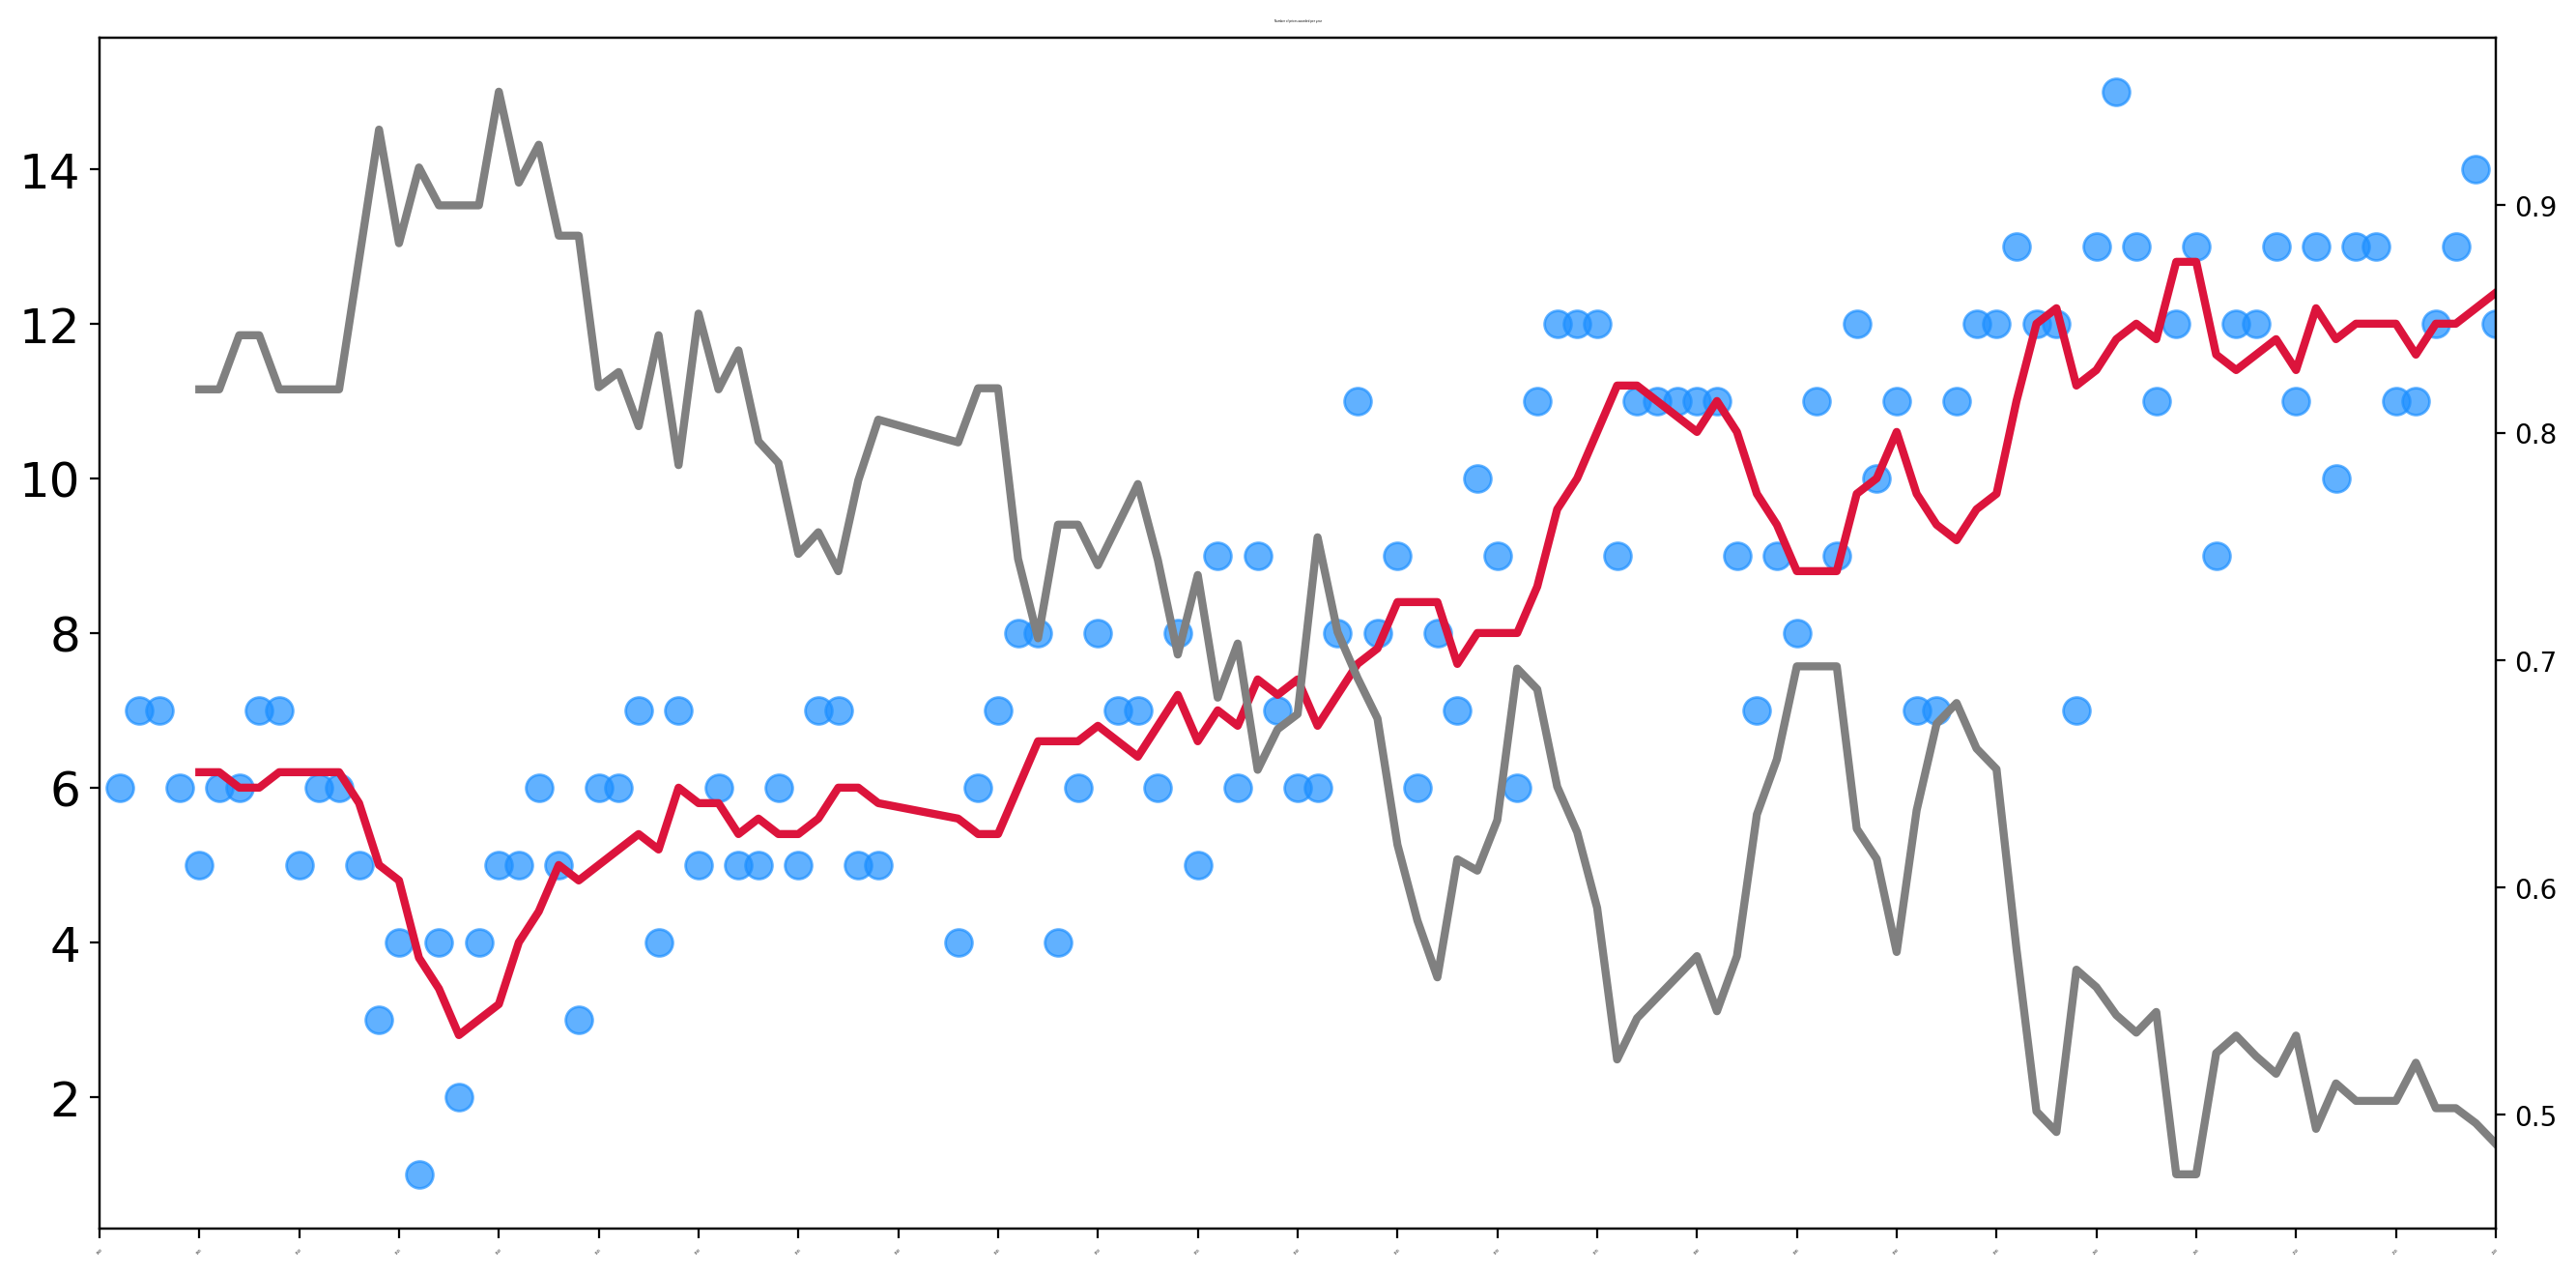

In [8]:
#challenge number 2
yearly_average_mean = df.groupby('year').agg({'share_pct' : pd.Series.mean})
share_moving_average = yearly_average_mean.rolling(window=5).mean()
plt.figure(figsize=(16,8),dpi=200)
plt.title('Number of prices awarded per year',fontsize=1)
plt.yticks(fontsize=18)
plt.xticks(ticks=np.arange(1900,2021,step=5),fontsize=1,rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx() # create second y-axis
ax1.set_xlim(1900, 2020)

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()


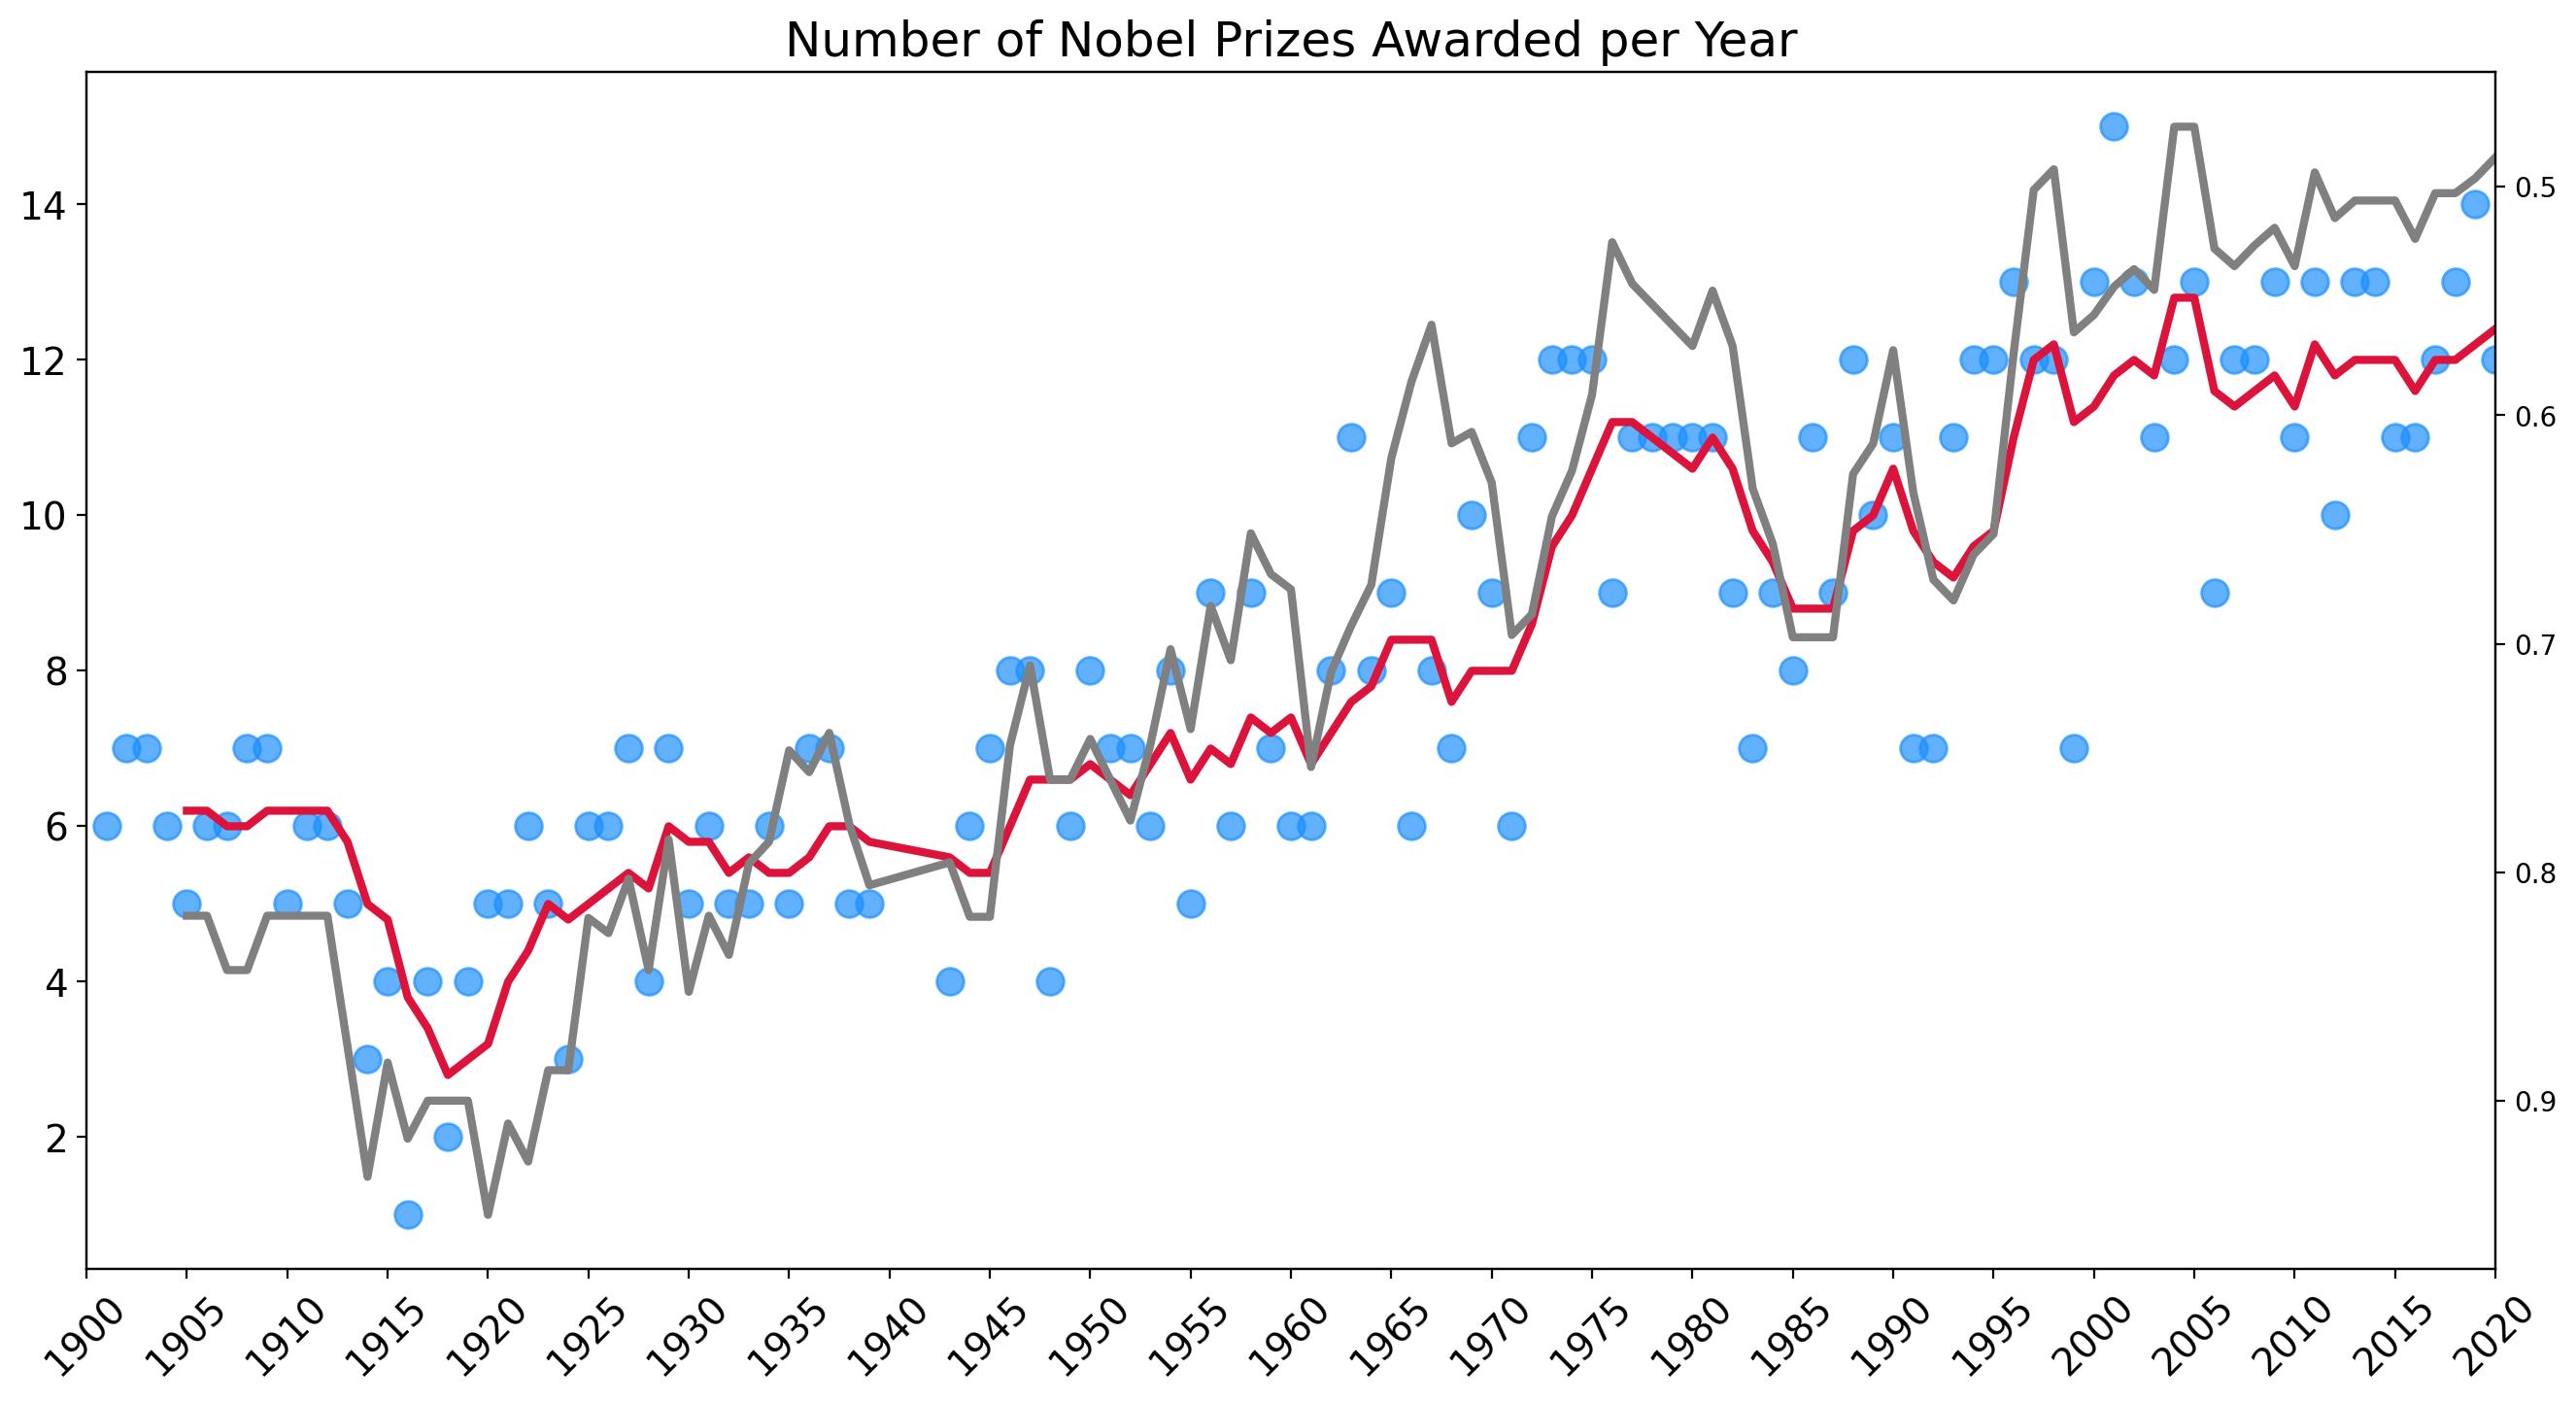

In [9]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5), 
           fontsize=14, 
           rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.set_xlim(1900, 2020)

# Can invert axis
ax2.invert_yaxis()

ax1.scatter(x=prize_per_year.index, 
           y=prize_per_year.values, 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax1.plot(prize_per_year.index, 
        moving_average.values, 
        c='crimson', 
        linewidth=3,)

ax2.plot(prize_per_year.index, 
        share_moving_average.values, 
        c='grey', 
        linewidth=3,)

plt.show()

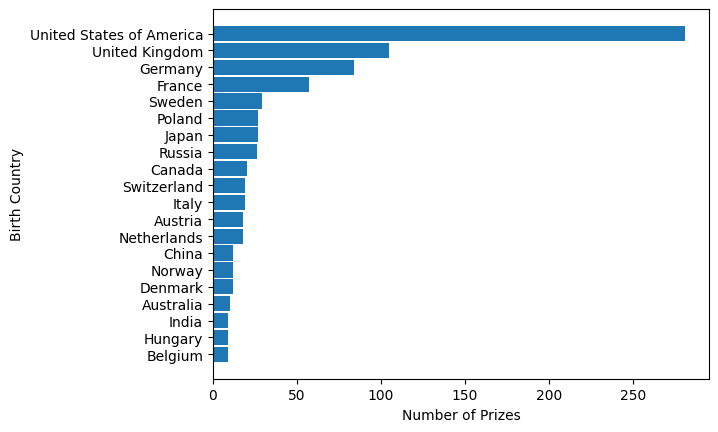

In [3]:
number_of_prices = df.groupby(['birth_country_current']).agg({'prize': pd.Series.count})
number_of_prices.sort_values('prize', inplace=True)
top_20_countries = number_of_prices[-20:]

# Use barh correctly
fig, ax = plt.subplots()
ax.barh(top_20_countries.index, top_20_countries['prize'], height=0.9)  # Use 'height' to control the bar height
ax.set_xlabel('Number of Prizes')
ax.set_ylabel('Birth Country')

plt.show()

In [42]:
df_countries = df.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False, inplace=True)  # Make sure to sort in place

world_map = px.choropleth(df_countries,
                          locations='ISO',
                          color='prize', 
                          hover_name='birth_country_current', 
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True)

world_map.show()

In [43]:
# cat_country = df.groupby(['birth_country_current', 'category'], 
#                                as_index=False).agg({'prize': pd.Series.count})
# cat_country.sort_values(by='prize', ascending=False, inplace=True)

# merged_df = pd.merge(cat_country, df_countries, on='birth_country_current')
# # change column names
# merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize'] 
# merged_df.sort_values(by='total_prize', inplace=True)



ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [54]:
line_data = df.groupby(['birth_country_current', 'year']).agg({'prize': pd.Series.count}).reset_index()
prize_by_year = line_data.sort_values('year')[['year', 'birth_country_current', 'prize']]

cumulative_prizes = prize_by_year.groupby(by=['birth_country_current',
                                              'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True) 
# Update the figure variable after sorting the DataFrame
fig = px.line(line_data,
              x='year', 
              y='prize', 
              color='birth_country_current',
                hover_name='birth_country_current')
fig.show()


In [66]:
top20_orgs = df.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=False, inplace=True)

fig = px.bar(top20_orgs,x=top20_orgs.values,
             y=top20_orgs.index,
             orientation='h',
             color=top20_orgs.index)
fig.show()

In [70]:
top_20_city = df.birth_city.value_counts()
top_20_city.sort_values(ascending=False,inplace=True)
fig = px.bar(top_20_city,x=top_20_city.values,
             y=top_20_city.index,
             orientation='h',
             color=top_20_city.index)
fig.show()

In [73]:
#sunburst chat
country_city_org = df.groupby(by=['organization_country', 
                                       'organization_city', 
                                       'organization_name'], as_index=False).agg({'prize': pd.Series.count})

country_city_org = country_city_org.sort_values('prize', ascending=False)
burst = px.sunburst(country_city_org, 
                    path=['organization_country', 'organization_city', 'organization_name'], 
                    values='prize',
                    title='Where do Discoveries Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)

burst.show()